# Logistic Regression of Credit Defaults
## MSDS 7349 - Section 401
## Lab 1

[Data Science @ Southern Methodist University](https://datascience.smu.edu/)

# Table of Contents
* [Team Members](#Team-Members)
* [Business Understanding](#Business-Understanding)
* [Data Meaning Type](#Data-Meaning-Type)
* [Data Quality](#Data-Quality)
* [Simple Statistics](#Simple-Statistics)
* [Visualize Attributes](#Visualize-Attributes)
* [Explore Joint Attributes](#Explore-Joint-Attributes)
* [Explore Attributes and Class](#Explore-Attributes-and-Class)
* [New Features](#New-Features)
* [Exceptional Work](#Exceptional-Work)
* [References](#References)

# <a name="Team-Members"></a>Team Members
* [Jostein Barry-Straume](https://github.com/josteinstraume)
* [Kevin Cannon](https://github.com/kcannon2)
* [Ernesto Carrera Ruvalcaba](https://github.com/ecarrerasmu)
* [Adam Tschannen](https://github.com/adamtschannen)

# <a name="Business-Understanding"></a>Business Understanding
*Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.*

> The credit default data set is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#). It has 30,000 records with 24 attributes. The records reflect the payment data from an important Taiwanese bank during October, 2005 (Yeh & Lien 2475).

> The purpose of the data set was to tackle the issue of forecasting the probability of default. In particular, the researchers of this data set sought to determine if the "estimated probability of default produced from data mining methods... (could) represent the "real" probability of default" (Yeh & Lien 2473).

> One way to define and measure the outcomes from the data set would be to perform a logistic regression. In doing so, one could predict if a customer would default on a credit payment in the next month.

> In order to measure the effectiveness of the prediction algorithm, the data set will be randomly split into a training and a test data sets. Consequently, we can then measure the accuracy of the prediction algorithm with real world data.

# <a name="Data-Meaning-Type"></a>Data Meaning Type
*Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.*

| Variable | Variable Type | Description |
| :------: | :-----------: | :----- |
| LIMIT_BAL | int64 | The amount of the given credit in New Taiwan dollars.<br/>It includes both the individual consumer credit and his/her family (supplementary) credit |
| SEX | int64 | Defines each subjects gender with:<ul><li>1 = Male</li><li>2 = Female</li></ul> |
| EDUCATION | int64 | Represents each subject level of education with:<ul><li>1 = Graduate School</li><li>2 = University</li><li>3 = High School</li><li>4 = Other</li></ul> |
| MARRIAGE | int64 | Defines the person's relationship status by:<ul><li>1 = Married</li><li>2 = Single</li><li>3 = Other</li></ul> |
| AGE | int64 | Defines how old each person is in years |
| PAY_0 | int64 | The repayment status in September, 2005 |
| PAY_2 | int64 | The repayment status in August, 2005 |
| PAY_3 | int64 | The repayment status in July, 2005 |
| PAY_4 | int64 | The repayment status in June, 2005 |
| PAY_5 | int64 | The repayment status in May, 2005 |
| PAY_6 | int64 | The repayment status in April, 2005 |
| BILL_ATM1 | int64 | The repayment status in September, 2005 |
| BILL_ATM2 | int64 | The repayment status in August, 2005 |
| BILL_ATM3 | int64 | The repayment status in July, 2005 |
| BILL_ATM4 | int64 | The repayment status in June, 2005 |
| BILL_ATM5 | int64 | The repayment status in May, 2005 |
| BILL_ATM6 | int64 | The repayment status in April, 2005 |
| PAY_ATM1 | int64 | The amount paid in September, 2005 |
| PAY_ATM2 | int64 | The amount paid in August, 2005 |
| PAY_ATM3 | int64 | The amount paid in July, 2005 |
| PAY_ATM4 | int64 | The amount paid in June, 2005 |
| PAY_ATM5 | int64 | The amount paid in May, 2005 |
| PAY_ATM6 | int64 | The amount paid in April, 2005 |
| default payment next month | int64 | A binary value indicating default status with:<ul><li>0 = Customer has defaulted</li><li>1 = Customer has not defaulted</li></ul>|

'default_next_m' : Is a binary variable response variable with “Yes, they defaulted” = 1 and  “No, they did not default”  = 0 The other 23 variables, which are explained below, are the explanatory variables: 

'LIMIT_BAL' :Is the amount of the given credit in New Taiwan dollars. It includes both the individual consumer credit and his/her family (supplementary) credit. 

‘GENDER’: Defines each subjects gender with 1 = male and  2 = female.

‘EDUCATION’: Represents each subject level of education with:
1 = graduate school
2 = university
3 = high school
4 = others

Please note a classification of “0”,”5” and “6” were found while grouping the Education category. These undefined categories were grouped in with the “4” category “Other” because of the logic they are not defined as a graduate school, university or high school. This means they have education outside of those parameters so they will be in the “Other” category which also is outside of the first three categories.
‘MARRIAGE’: Defines the persons state of 1 = married, 2 = single and 3 = others. 
‘AGE’: defines how old each person is in years.

The below variables measure the repayment status in each month. 

x6'PAY_0' = the repayment status in September, 2005
x7'PAY_2' = the repayment status in August, 2005
x8  'PAY_3'= the repayment status in July, 2005
x9'PAY_4'= the repayment status in June, 2005
x10'PAY_5'= the repayment status in May, 2005
x11‘PAY_6’ = the repayment status in April, 2005

The scale for the PAY_ variables above is as follows:
-1 = pay duly
1 = payment delay for one month
2 = payment delay for two months
3 = payment delay for two months
4 = payment delay for two months
5 = payment delay for two months
6 = payment delay for two months
7 = payment delay for two months
8 = payment delay for eight months
9 = payment delay for nine months and above. 

*note there is no “0” classifier

The below variables represent the amount of how much each individual owes on their bill statement in New Taiwan dollars:
X12 'BILL_AMT1'= the repayment status in September, 2005
X13 'BILL_AMT2'= the repayment status in August, 2005
X14   ‘BILL_AMT3'= the repayment status in July, 2005
X15 'BILL_AMT4'= the repayment status in June, 2005
x16 'BILL_AMT5'= the repayment status in May, 2005
x17 ‘BILL_AMT6'= the repayment status in April, 2005

The below variables define the amount of previous payment New Taiwanese dollar: X18-X23: Amount of previous payment (NT dollar). 
X18 'PAY_AMT1' = the amount paid in September, 2005
X19 'PAY_AMT2' = the amount paid in August, 2005
X20 ‘'PAY_AMT3' = the amount paid in July, 2005
X21 'PAY_AMT4' = the amount paid in June, 2005
X22 'PAY_AMT5' = the amount paid in May, 2005
X23 ‘'PAY_AMT6' = the amount paid in April, 2005


In [63]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
#import statistics as st
import csv as csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline

filepath = "/Users/Jostein/Grad School/SMU/7331/project1/credit-default/data/default of credit card clients.xls"
#filepath = "/Users/ernestcarrera/Documents/Master Data Science/DataMining/Lab1/default of credit card clients.xls"

credit = pd.read_excel(filepath, header=1, skiprows=0)

# Rename column(s)
credit = credit.rename(columns={'default payment next month': 'default_next_m', 'PAY_0': 'PAY_1'})

# <a name="Data-Quality"></a>Data Quality
*Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.*



>The data set does not have missing values. The number of missing values per variable is presented below:

In [64]:
#### Validating we do not have missing values
credit.isnull().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_1             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
default_next_m    0
dtype: int64

> The field "ID" in the data set represents customers. To validate the presence of duplicates in the data, we counted the number of duplicates by the field "ID". There are not duplicates records.

In [65]:
########checking for duplicates in the ID
credit['is_duplicated']=credit.duplicated('ID')
print ("The number of duplicates is:")
print (credit['is_duplicated'].sum())

credit.drop('is_duplicated', axis=1, inplace=True)


The number of duplicates is:
0


> The variables SEX, MARRIAGE, EDUCATION, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 are categorical with numeric values encoded. We will validate that the data dictionary provided covers all of the values in the data. The plots that follow show the number of cases for each category to visualize their representativeness.

SEX


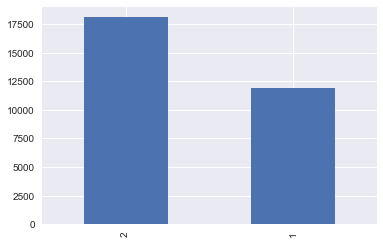

EDUCATION


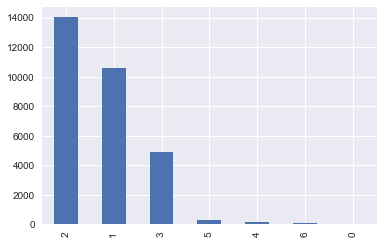

MARRIAGE


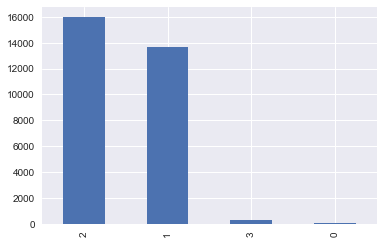

PAY_1


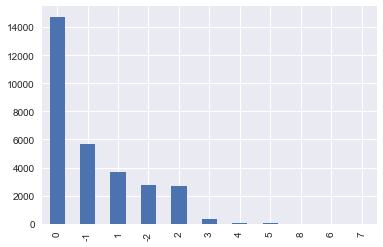

PAY_2


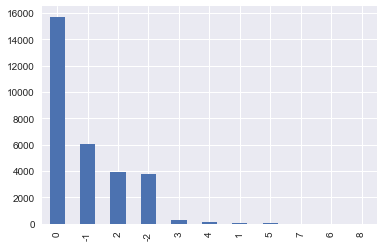

PAY_3


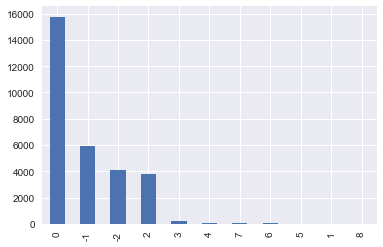

PAY_4


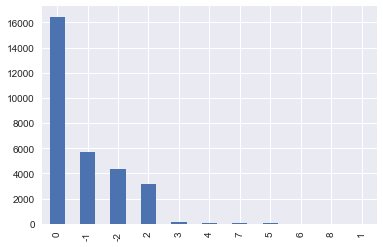

PAY_5


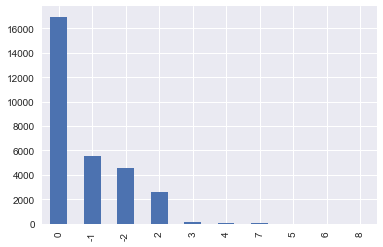

PAY_6


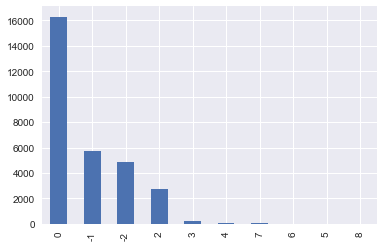

In [66]:
vars_to_plot_separate=['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for index,plot_vars in enumerate(vars_to_plot_separate):
    print(plot_vars)
    default_gen_g=credit.groupby(by=plot_vars)
    credit[plot_vars].value_counts().plot(kind='bar')
    plt.show()


>  The variable "SEX" presents the value of 1 and 2, the former represent Males and the later FEMALES. The number of loans granted to females are greater than the ones granted to males.

> The values 0,5 and 6 for the variable "EDUCATION" are not defined in the data dictionary. However, they do not represent a concern given the low number of observations in each of these categories. We decided to include these values in the category "OTHER" (encoded with 4). In order to support this decision,  we have identified by visual inspection that the distribution of the amount of the credit given (variable LIMIT_BAL) broken down by "SEX" of the categories of 0, 4, 5 and 6 are to some extent similar. The violin plot below exhibits how similar the distributions are. We created the variable "EDUCATION_INP" assigning the value of 4 (Others) to the values 0,5 and 6. It is also exhibited a table with the new distribution of the variable after imputing the values, as expected, this category shows very low number of observations.

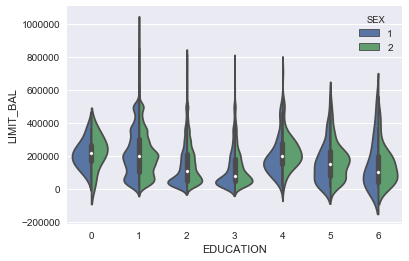

col_0          count
EDUCATION_INP       
1              10585
2              14030
3               4917
4                468


In [68]:
# Source:
# http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot


plt.figure()
ax = sns.violinplot(x="EDUCATION", y="LIMIT_BAL", hue="SEX", data=credit, split=True)
plt.show()

#CREATING NEW VARIABLE TO IMPUTE THE VALUES TO 4, THAT REPRESETNS OTHER
credit['EDUCATION_INP']=credit['EDUCATION']

credit.loc[credit['EDUCATION'] > 4, 'EDUCATION_INP'] = 4
credit.loc[credit['EDUCATION'] == 0, 'EDUCATION_INP'] = 4



my_tab = pd.crosstab(index=credit["EDUCATION_INP"],  # Make a crosstab
                              columns="count")      # Name the count column

print(my_tab)

> The value of "0" in the variable "MARRIAGE" is not defined. The number of observations in this category is very low and it does not represent a concern. We assumed this is a data entry error and we imputed the value of "2" (single) since it is the category with the highest frequency (mode). We created the variable "MARRIAGE_INP" assigning the value of 2 (SINGLE) to the values of 0. It is also exhibited a table with the new distribution of the variable after imputing the values, as expected, this category shows very low number of observations.

In [69]:
####FOR MARRIAGE
#CREATING NEW VARIABLE TO IMPUTE THE VALUES TO 2, THAT REPRESETNS SINGLE, since the value of 0 is not defined in
#the data dictionary
credit['MARRIAGE_INP']=credit['MARRIAGE']


credit.loc[credit['MARRIAGE'] == 0, 'MARRIAGE_INP'] = 2



my_tab = pd.crosstab(index=credit["MARRIAGE_INP"],  # Make a crosstab
                              columns="count")      # Name the count column

print(my_tab)

col_0         count
MARRIAGE_INP       
1             13659
2             16018
3               323


> The values of -2 and 0 are not defined for the variables PAY_1,...PAY6. The lack of a description for the value of "0" is critical, given the high proportion of records that fall in this category, We assumed that this is an error in the label and the values of 0 and -2 should be categorized as -1, that represents that the customer has payed duly. In order to validate this assumption, we plotted the default rate for all the categories of the variable PAY_1 to demonstrate that they exhibit very similar default rate and grouping them is valid. The variable PAY_1 is shown below and confirms this assumption.

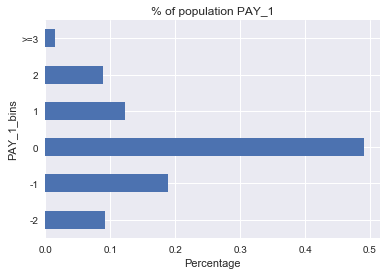

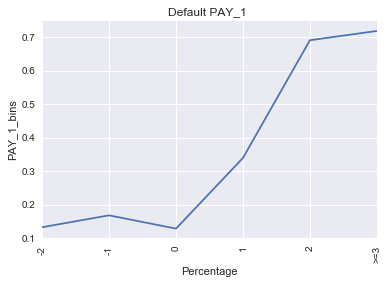

In [70]:

########### CREATING A FUNCTION TO EXECUTE BIVARIATES
def bivariate_v1(var_name,RangeName,CutOff,NumBins,BinLabel,var_x,var_y,title1,title2):
#def bivariate_v1(NumBins): 
    #Creating the BINS
    credit[RangeName]=pd.cut(var_name,CutOff,NumBins,labels=BinLabel)
    #Grouping by the BINS variable
    default_g=credit.groupby(by=[RangeName])
    #% of POPULATION
    bins_percentage=default_g[RangeName].count()/credit[RangeName].count()
   
    
    #CHART WITH THE %OF POPULATION WITH THE BINS
    #print bins_percentage
    ax=bins_percentage.plot(kind='barh')
    plt.title(title1)
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.show()
    
    ### default rate
    t=default_g.default_next_m.sum()/default_g.default_next_m.count()
  
    ax=t.plot(kind='line')
    plt.title(title2)
    plt.xlabel(var_x)
    
    plt.xticks(rotation='vertical')
    
    plt.ylabel(var_y)
    plt.show()
    
bivariate_v1(credit.PAY_1,'PAY_1_range',[-2.1,-2,-1,0.01,1.1,2,10],6,['-2','-1','0','1','2','>=3'],'Percentage','PAY_1_bins','% of population PAY_1','Default PAY_1 ')

>After testing the soundness of our assumption, we created new variables PAY_1_range,PAY_2_range,....PAY_6_range to group the values of -2,-1 and 0 in one single group called "Pay duly", the code that follows executes this task. Given the low number of observations for the delays with more or equal than 1 month, we have grouped them to make the bin more representative while keeping the expected default rate for the bin.

>We also present the proportion of observations for the new categories and other graph to exhibit the default rate. All of the charts confirm the low default rate for the group "Pay duly".

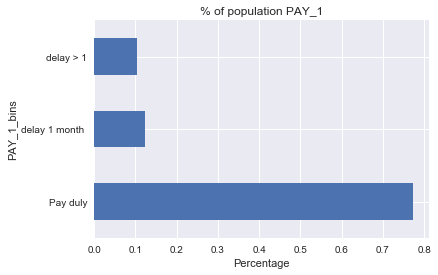

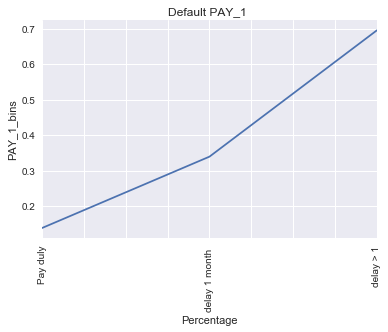

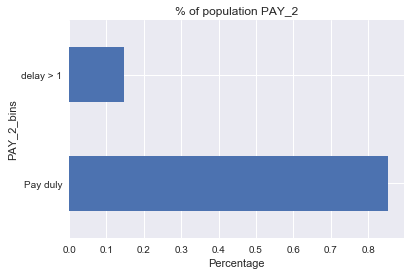

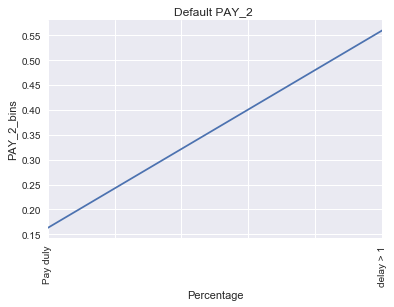

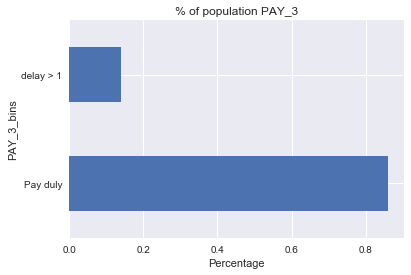

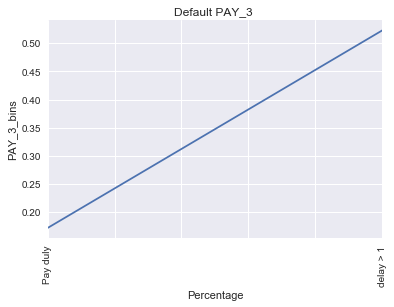

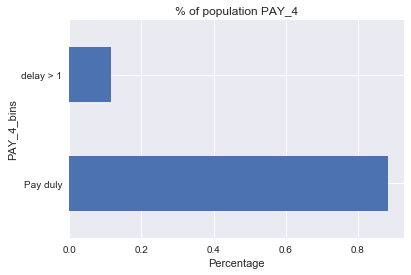

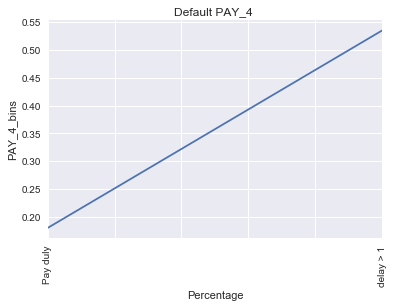

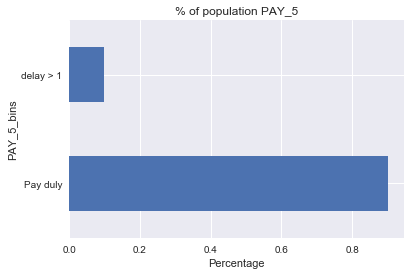

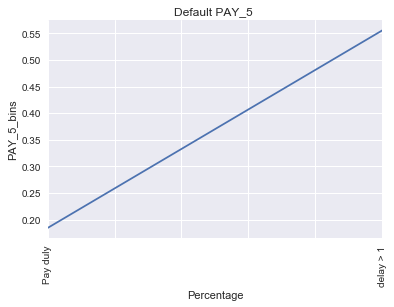

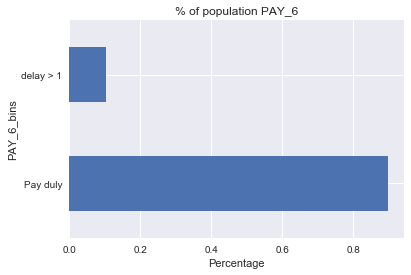

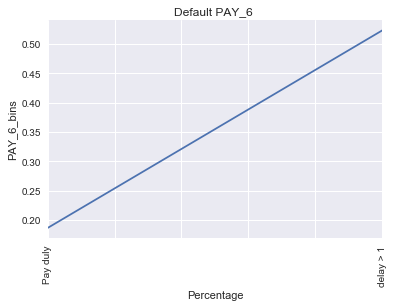

In [71]:
bivariate_v1(credit.PAY_1,'PAY_1_range',[-2.1,0,1,10],3,['Pay duly','delay 1 month ','delay > 1'],'Percentage','PAY_1_bins','% of population PAY_1','Default PAY_1 ')

bivariate_v1(credit.PAY_2,'PAY_2_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_2_bins','% of population PAY_2','Default PAY_2 ')

bivariate_v1(credit.PAY_3,'PAY_3_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_3_bins','% of population PAY_3','Default PAY_3 ')

bivariate_v1(credit.PAY_4,'PAY_4_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_4_bins','% of population PAY_4','Default PAY_4 ')

bivariate_v1(credit.PAY_5,'PAY_5_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_5_bins','% of population PAY_5','Default PAY_5 ')

bivariate_v1(credit.PAY_6,'PAY_6_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_6_bins','% of population PAY_6','Default PAY_6 ')


>  We analyze the range of values for the continuous variables. The tables below are telling us that the minimum amount of credit granted starts from 10,000. The amount of bill statement can be negative, this means that the customer payed more than the requested amount during the month of analysis. Finally, the minimum value that the amount paid takes is zero, that represents the lack of payment. 



In [24]:
credit['LIMIT_BAL'].describe() 



count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [25]:
credit['BILL_AMT1'].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

In [26]:
credit['PAY_AMT1'].describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

>The box plots that follow aim to help us identifying outliers for the continuous/ratio variables.

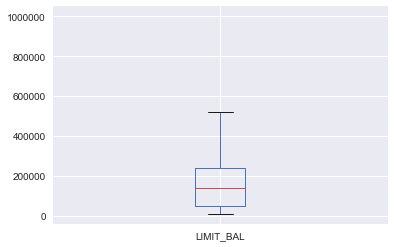

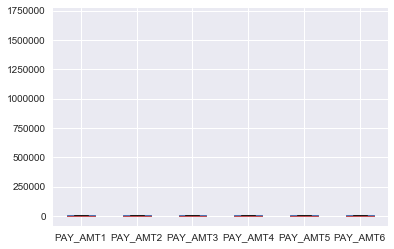

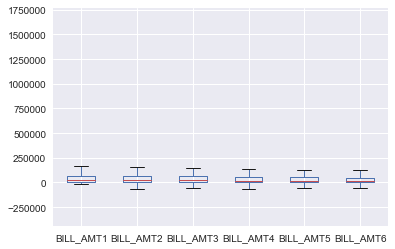

In [73]:
vars_to_plot_separate=[['LIMIT_BAL'],
                       ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],
                       ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']   
                      ]


for index,plot_vars in enumerate(vars_to_plot_separate):
   
    ax=credit.boxplot(column=plot_vars,return_type='dict')
    plt.show()
                  

> The box plots confirm the presence of outliers for the ratio type variables. In order to mitigate this, we will define new variables in which we categorize the variable by creating bins with different default rate.  We first show the bins for the amount of credit given. The higher the amount of credit granted the lower the default rate. 

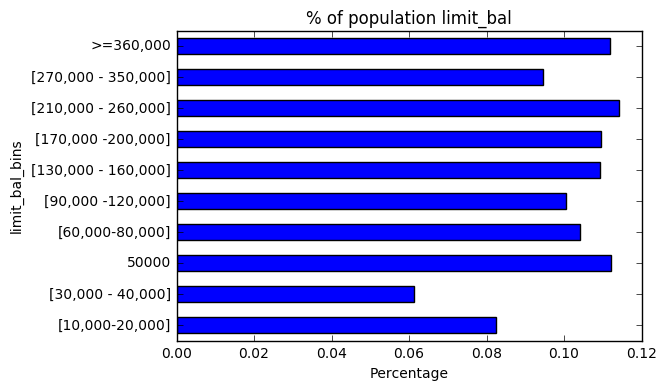

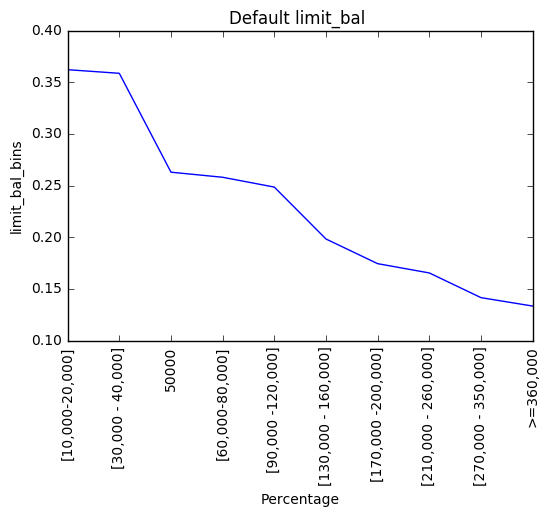

In [21]:
bivariate_v1(credit.LIMIT_BAL,'limit_bal_range',[0,20000,40000,50000,80000,120000,160000,200000,260000,350000,999999999],10,['[10,000-20,000]','[30,000 - 40,000]','50000','[60,000-80,000]','[90,000 -120,000]','[130,000 - 160,000]','[170,000 -200,000]','[210,000 - 260,000]','[270,000 - 350,000]','>=360,000'],'Percentage','limit_bal_bins','% of population limit_bal','Default limit_bal ')



> The definition of bins for the historical variables with the amount of bill statement are exhibited below. It is very interesting to see that this group does not exhibit very low default rate. It appears that customers with negative balance do not monitor the amount of the bill statement for the next month and they rely on the funds available which at the end are not enough and being  labeled as default in the next month.

>Moreover, there is not a strictly monotonic trend between the amount of the bill statement and the default rate. The  default rate increases as the bill amount increases but it gets to some point in which the default rate starts to decline. The former can be explained by customers that are receiving higher bills for which they cannot afford and they default the next month but there are other customers with high income who can afford a high amount of bill statement.

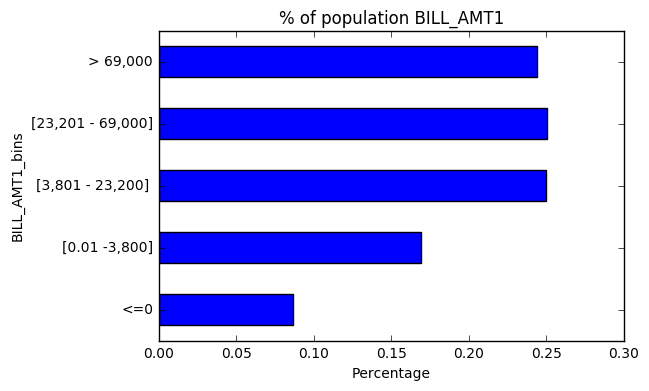

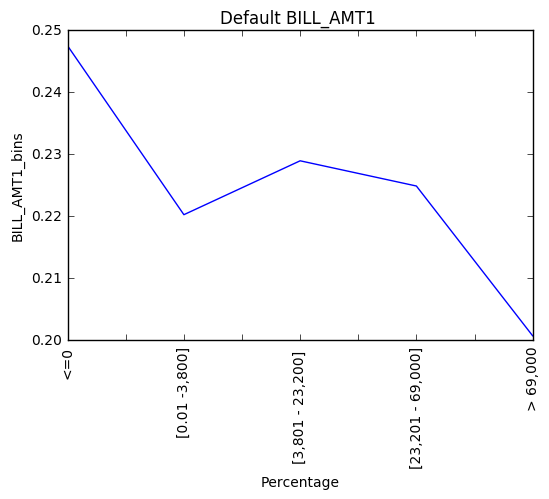

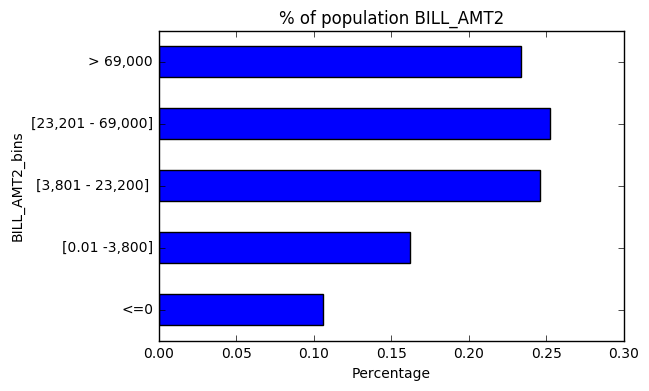

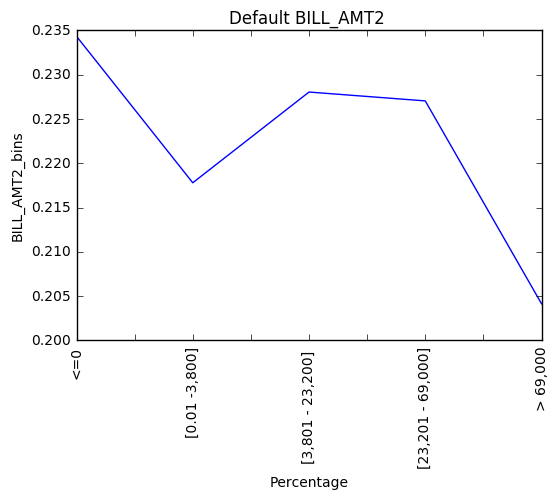

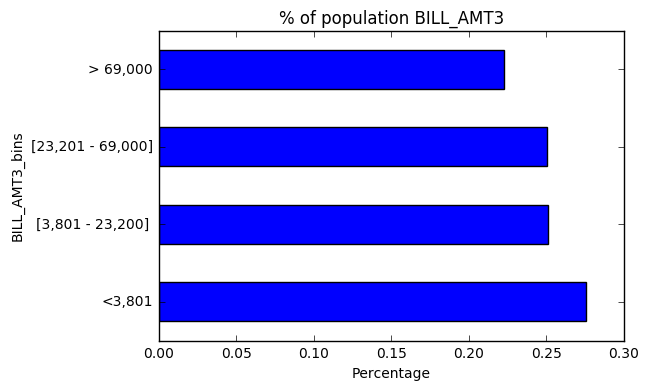

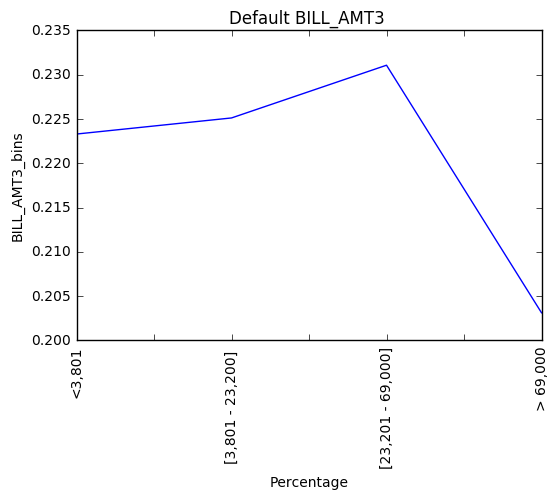

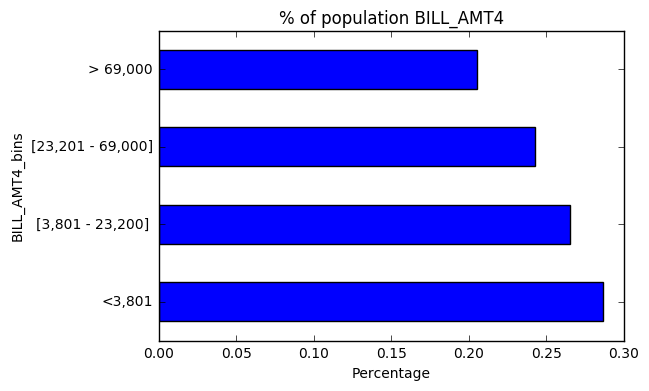

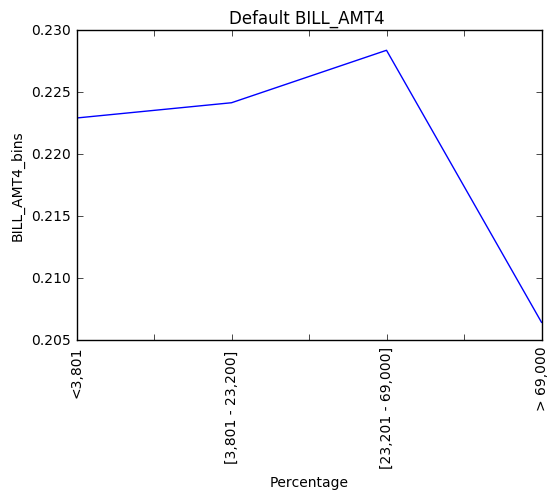

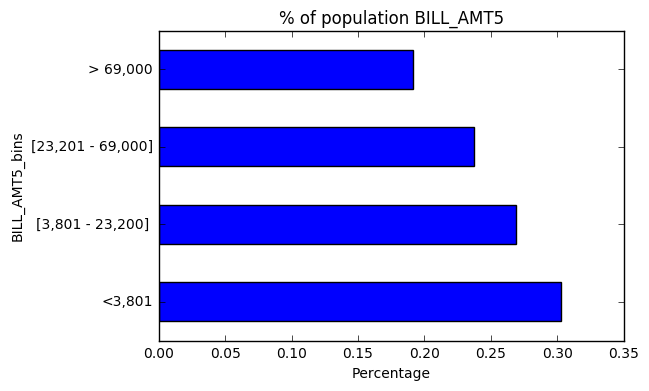

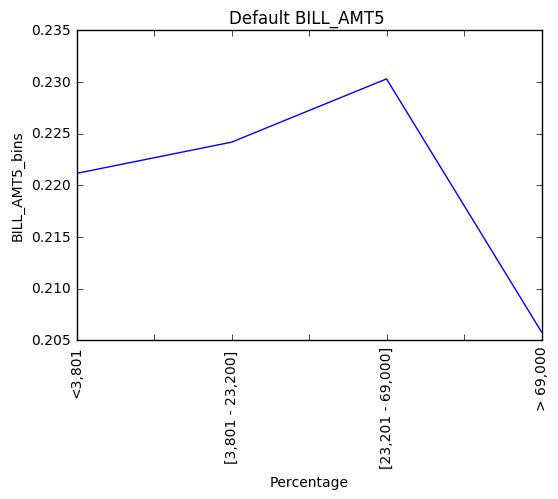

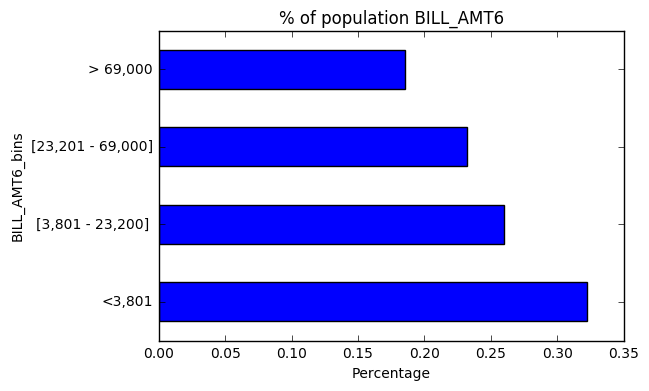

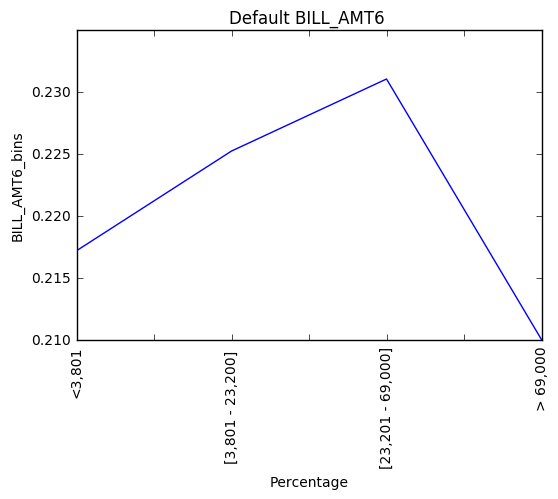

In [23]:
###### bIVARIATE PART II .  -- BILL AMOUNT


bivariate_v1(credit.BILL_AMT1,'BILL_AMT1_range',[-999999,0,3800,23200,69000,999999],5,['<=0','[0.01 -3,800]','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT1_bins','% of population BILL_AMT1','Default BILL_AMT1 ')

bivariate_v1(credit.BILL_AMT2,'BILL_AMT2_range',[-999999,0,3800,23200,69000,999999],5,['<=0','[0.01 -3,800]','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT2_bins','% of population BILL_AMT2','Default BILL_AMT2 ')

bivariate_v1(credit.BILL_AMT3,'BILL_AMT3_range',[-999999,3800,23200,69000,999999],4,['<3,801','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT3_bins','% of population BILL_AMT3','Default BILL_AMT3 ')

bivariate_v1(credit.BILL_AMT4,'BILL_AMT4_range',[-999999,3800,23200,69000,999999],4,['<3,801','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT4_bins','% of population BILL_AMT4','Default BILL_AMT4 ')

bivariate_v1(credit.BILL_AMT5,'BILL_AMT5_range',[-999999,3800,23200,69000,999999],4,['<3,801','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT5_bins','% of population BILL_AMT5','Default BILL_AMT5 ')

bivariate_v1(credit.BILL_AMT6,'BILL_AMT6_range',[-999999,3800,23200,69000,999999],4,['<3,801','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT6_bins','% of population BILL_AMT6','Default BILL_AMT6 ')


> The definition of bins for the historical variables with the amount paid are exhibited below. As expected, the higher the amount of the payment the lower the default rate.


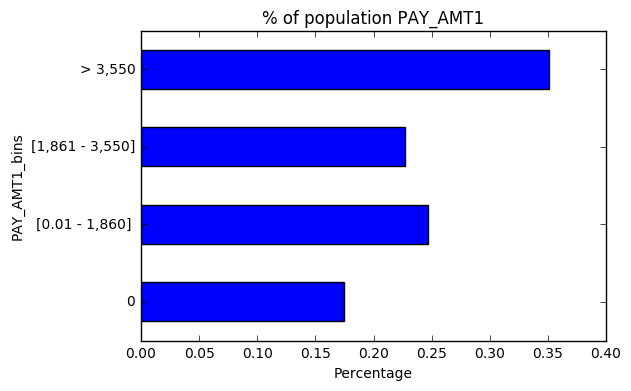

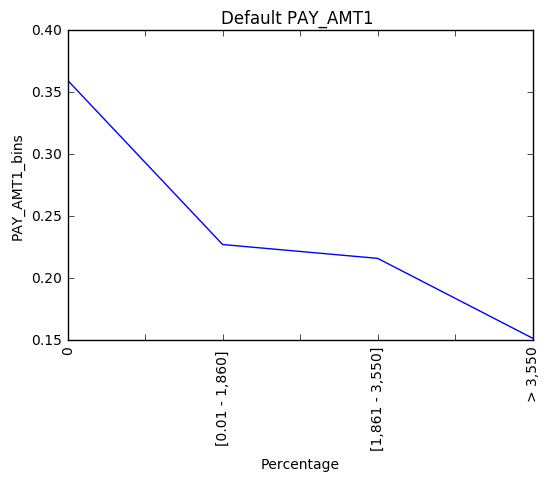

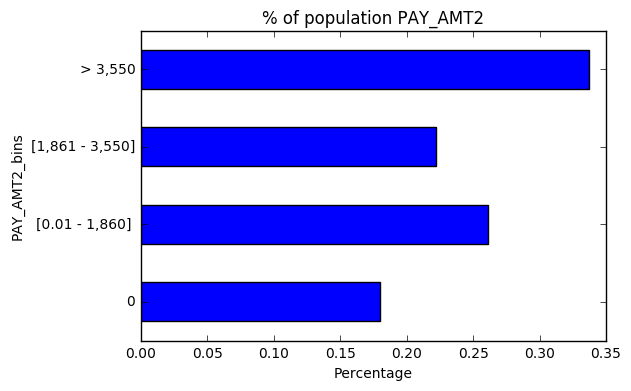

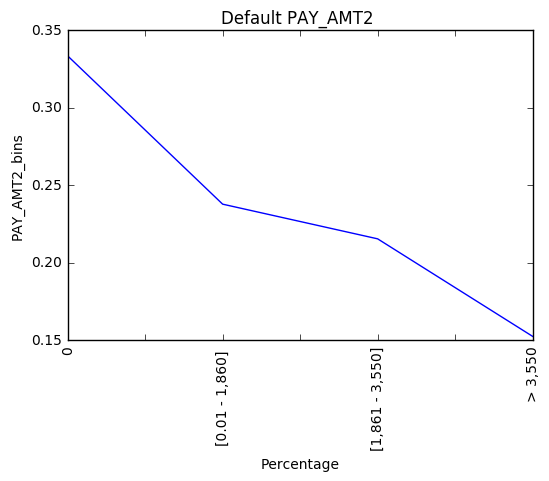

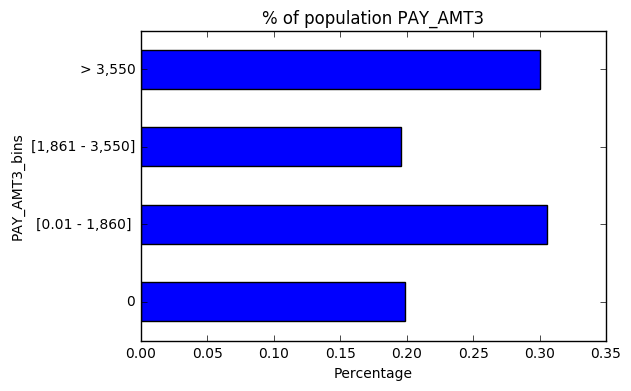

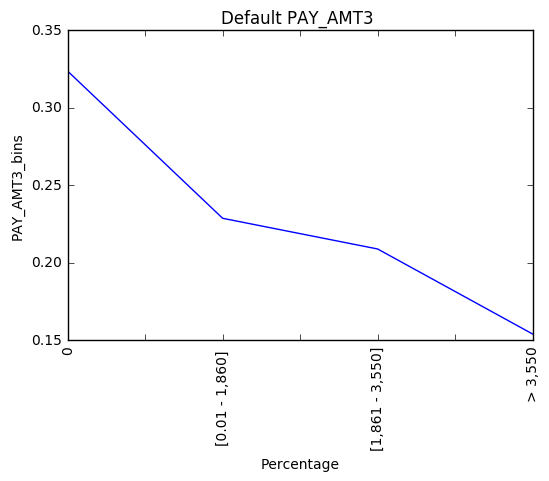

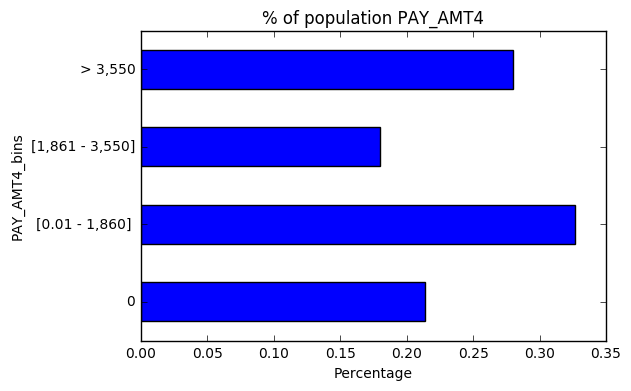

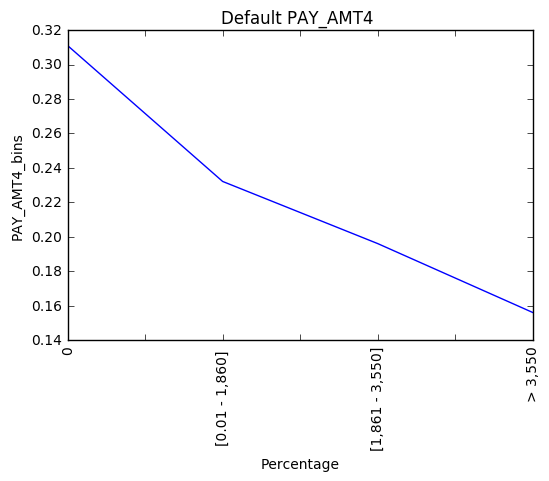

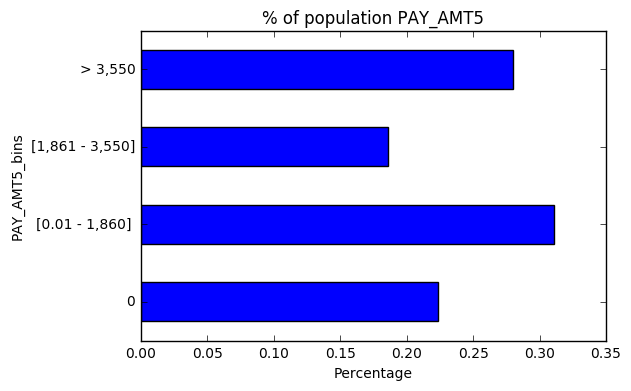

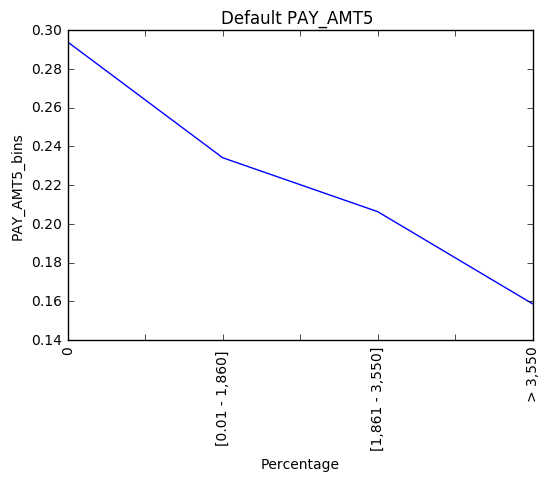

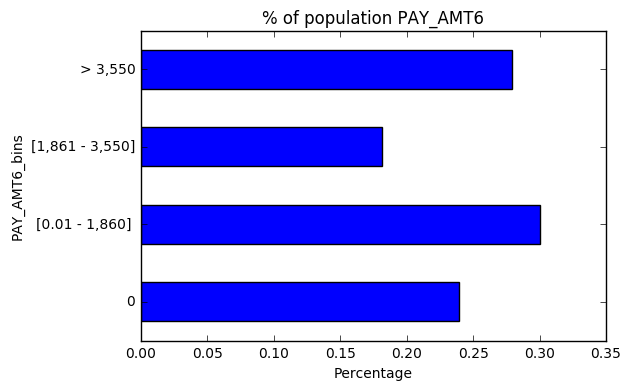

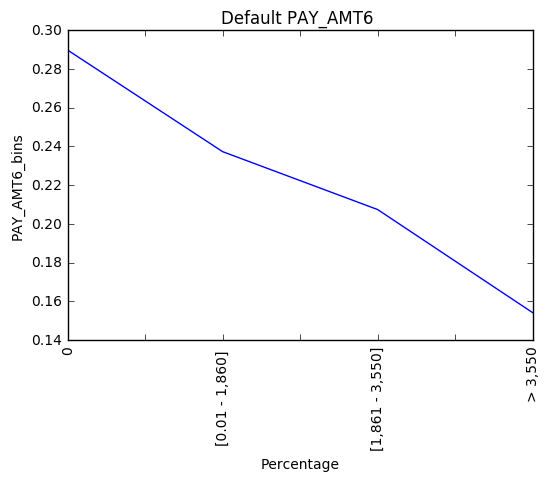

In [28]:
####BIVARIATE PART 3
bivariate_v1(credit.PAY_AMT1,'PAY_AMT1_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT1_bins','% of population PAY_AMT1','Default PAY_AMT1 ')

bivariate_v1(credit.PAY_AMT2,'PAY_AMT2_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT2_bins','% of population PAY_AMT2','Default PAY_AMT2 ')

bivariate_v1(credit.PAY_AMT3,'PAY_AMT3_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT3_bins','% of population PAY_AMT3','Default PAY_AMT3 ')

bivariate_v1(credit.PAY_AMT4,'PAY_AMT4_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT4_bins','% of population PAY_AMT4','Default PAY_AMT4 ')

bivariate_v1(credit.PAY_AMT5,'PAY_AMT5_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT5_bins','% of population PAY_AMT5','Default PAY_AMT5 ')

bivariate_v1(credit.PAY_AMT6,'PAY_AMT6_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT6_bins','% of population PAY_AMT6','Default PAY_AMT6 ')


# <a name="Simple-Statistics"></a>Simple Statistics
*Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.*

# <a name="Visualize-Attributes"></a>Visualize Attributes
*Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate*

# <a name="Explore-Joint-Attributes"></a>Explore Joint Attributes
*Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.*

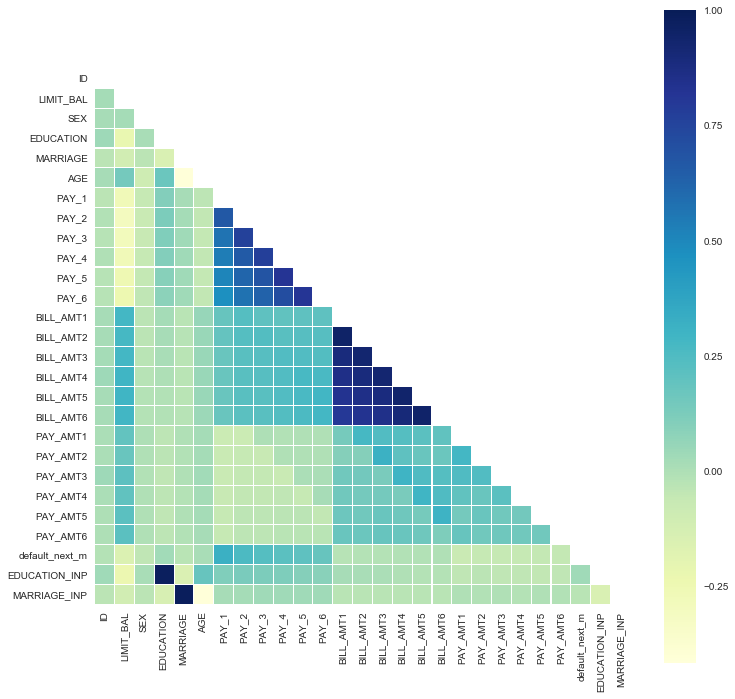

In [50]:
# Correlation heat map matrix
# Source:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
corr = credit.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(12, 12))
    credit_heatmap_corr = sns.heatmap(corr, mask=mask, square=True,
                                        linewidths=.1, cmap="YlGnBu")


> The above correlation heat map matrix provides an easily digestable and visually appealing manner in which to discern the relationships between attributes present within the credit default data set.

> The first noticeable pattern one might take note of is the 2 smaller dark blue triangles. These two triangles reflect the multicollinearity present within the PAY_X and BILL_AMTX attributes. Each bill amount attribute (BILL_AMTX) is nearly, if not completely, correlated with one another. Likewise, the lowest correlation coefficient among repayment status attributes (PAY_X) is approximately 0.50.

> Such high correlation among similiar attributes lends credence to the notion of creating new features based on the cumalative average from said like-minded attributes. Doing so would reduce collinearity concerns while at the same time prevent over-fitting when constructing the logistic regression model.

> Another pattern of note is the moderate-to-strong positive correlation between BILL_AMTX and LIMIT_BAL. On one hand it is common sense to reason that credit billing amount and available credit would be correlated. However, it is surprising that the two attributes are not more heavily correlated.

> Not so surprising is the moderate-to-strong positive correlation present between each of the BILL_AMTX attributes and each of the PAY_X attributes. Certainly the amount of credit due from the customer has an impact on the repayment status of said credit. In other words, a larger credit bill is more likely to be defaulted upon. It is important to note that a large credit bill does not necessarily mean that the customer has bad credit.

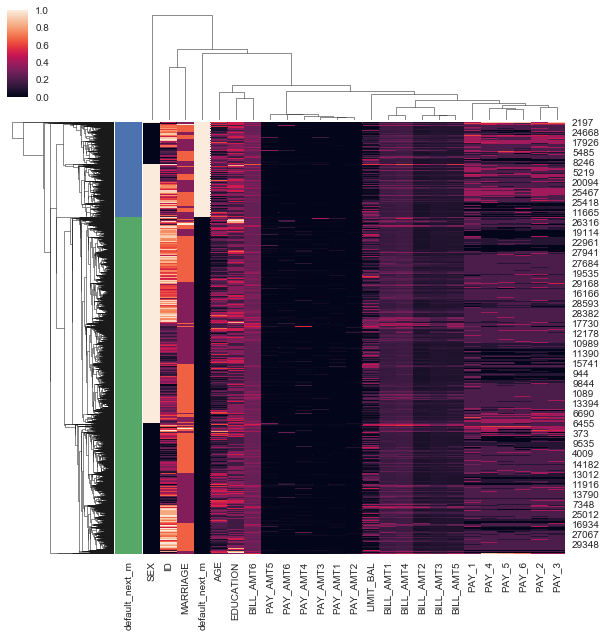

In [79]:
# Cluster Heat Map
# Source:
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
plt.figure()
sns.set(color_codes=True)
y_defaults = credit.default_next_m
lut = dict(zip(y_defaults.unique(), "bg"))
row_colors = y_defaults.map(lut)
g = sns.clustermap(credit[credit.columns[:25]], row_colors=row_colors, standard_scale=1)

> The hierarchical clustered heat map displayed above provides insight into the variability present within the data set. Hierarchical clustering is applied to both the variables and observations (columns and rows respectively). Moreover, the variables are standardized to avoid a situation wherein clustering occurs purely due to distance between observations.

> The dendogram located on the top of the plot cleanly splits the variables. The large swath of black present in the plot indicates that the payment of amounts of customers throughout the year are categorically uncorrelated.

> Observations in which the customer defaulted on their credit is represented by the blue rows. In contrast, observations in which the customer did not default on their credit is represented by the green rows. It is visually apparent that the data set is imbalanced with the overrepresentation of non-defaulting customers.

> The large swatch of tan within the sex column is accompanied by varying chunks of orange and purple blocks within the marriage column. The legend in the above plot represents high, moderate-to-strong, and moderate correlations by tan, orange, and purple respectively. Consequently this overlap of swatches between sex and marriage suggests that perhaps one gender is more likely to have a certain relationship status than another.

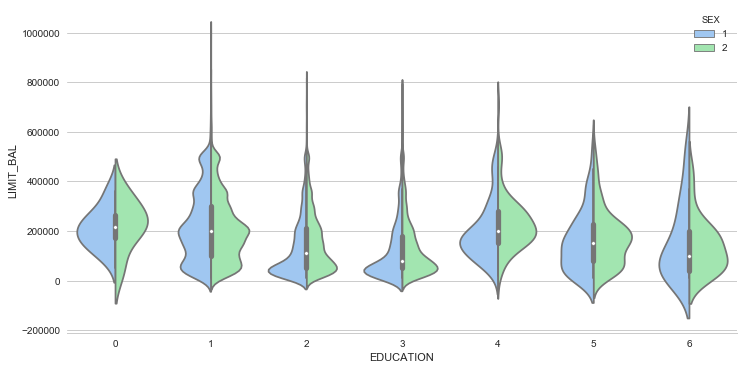

In [55]:
# Violin plot of limit balance distribution by education level per sex
# Source:
# http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
ax = sns.violinplot(x="EDUCATION", y="LIMIT_BAL", hue="SEX", data=credit, split=True)
sns.despine(left=True)


> Blurb explaining above violin plot here

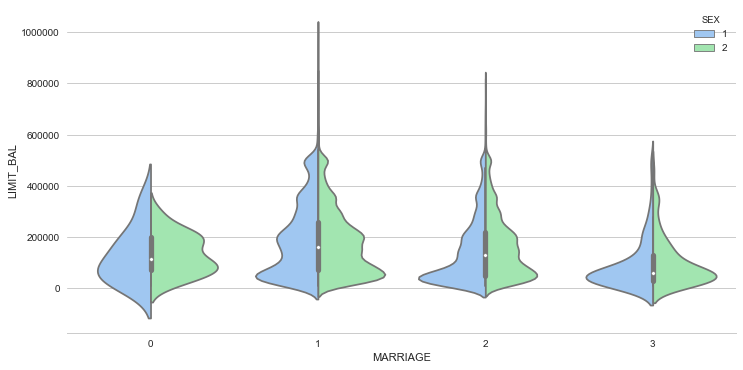

In [56]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
ax = sns.violinplot(x="MARRIAGE", y="LIMIT_BAL", hue="SEX", data=credit, split=True)
sns.despine(left=True)

> The violin plot above reflects the distributions of limit balances by relationship status per sex. Married and single individuals (1 and 2 respectively) of both genders appear to have some outliers. Consequently, the married and single violin plots are heavily skewed towards large limit balances with very long tails. This gives some consideration for data set transformation when the time comes for model building.

# <a name="Explore-Attributes-and-Class"></a>Explore Attributes and Class
*Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).*

# <a name="New-Features"></a>New Features
*Are there other features that could be added to the data or created from existing features? Which ones?*

> Calculate limit balance

# <a name="Exceptional-Work"></a>Exceptional Work
*You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.*

> Along with spending easily 20 hours on this project, believe there is plethora of little things that add up to a create a polished professional project. In particular, Markdown formatting was utilized to a moderately advanced degree to create a clean and smooth structure flow to the project.

> The Table of Contents section links to each subsection of the project within this Jupyter notebook. Additionally, hyperlinks were incorporated via Markdown to link to each team members GitHub profile page. Moreover, table formatting within Markdown lends to a clear presentation format for describing the meaning and type of data for each attribute in the data file.

In [57]:
# Build the logistic regression
# Source:
# https://machinelearningmastery.com/feature-selection-machine-learning-python/

# Find total number of columns
len(credit.columns)

# Set X variables for the model
# Slices all attributes except for 'default_next_m' into X
X = credit[credit.columns[:24]]

# Set Y variable for the model
Y = credit['default_next_m']

# Recursive Feature Selection for the top 10 performing variables
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)

print(fit)
print("Number of Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)
Number of Features: 10
Selected Features: [False False  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False]
Feature Ranking: [ 6 11  1  1  1  1  1  1  1  1  1  1  5  4 13 10 15 12  2  3  9  7  8 14]


# <a name="References"></a>References
* Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
* https://pandas.pydata.org/pandas-docs/stable/api.html